In [45]:
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

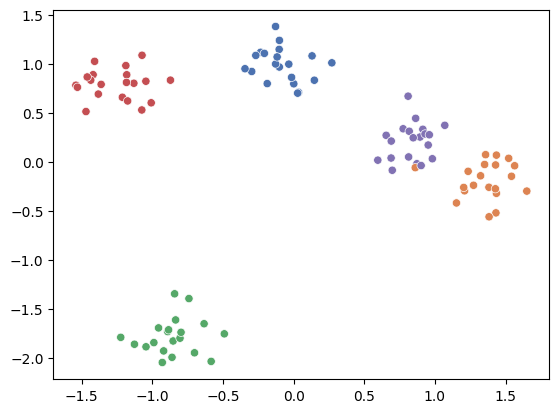

In [46]:
centers = 5
x_trn, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
x_trn = np.array(StandardScaler().fit_transform(x_trn))
sns.scatterplot(x=[X[0] for X in x_trn],
                y=[X[1] for X in x_trn],
                hue=true_labels,
                palette="deep",
                legend=None
                )

In [47]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [48]:
class KMeans:
    def __init__(self, clusters, max_iter) -> None:
        self.clusters = clusters
        self.max_iter = max_iter

    def fit(self, x_train):
        min_, max_ = np.min(x_train, axis=0), np.max(x_train, axis=0)
        self.centroids = [np.random.uniform(min_, max_) for _ in range(self.clusters)]
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.clusters)]
            for x in x_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def predict(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idx


In [49]:
model = KMeans(5, 5000)

In [50]:
model.fit(x_trn)

c:\Users\vladi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\vladi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


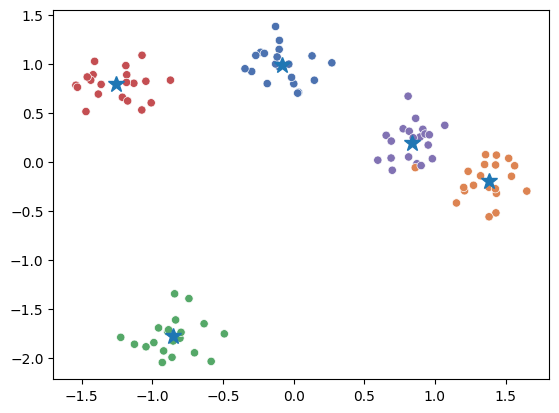

In [51]:
class_centers, classification = model.predict(x_trn)
sns.scatterplot(x=[X[0] for X in x_trn],
                y=[X[1] for X in x_trn],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in model.centroids],
         [y for _, y in model.centroids],
         '*',
         markersize=12,
         )
plt.show()